In [2]:
!pip install gdown
!gdown --id 1siZtGusB1LfQVapTvNOiYi8aeKKAgcDF
!unzip full-shape.zip -d /content/

'pip' is not recognized as an internal or external command,
operable program or batch file.


'gdown' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
import pickle

# Load training data
with open('full_shape_train_data.pkl', 'rb') as train_file:
    train_data = pickle.load(train_file)

# Print the structure of the first object in the dataset
print("Keys in the first object:", train_data[0].keys())
print("Semantic Class:", train_data[0]['semantic class'])
print("Affordances:", train_data[0]['affordance'])
print("Coordinate Shape:", train_data[0]['full_shape']['coordinate'].shape)
print("Label Keys:", train_data[0]['full_shape']['label'].keys())


Keys in the first object: dict_keys(['shape_id', 'semantic class', 'affordance', 'full_shape'])
Semantic Class: Door
Affordances: ['grasp', 'contain', 'lift', 'openable', 'layable', 'sittable', 'support', 'wrap_grasp', 'pourable', 'move', 'displaY', 'pushable', 'pull', 'listen', 'wear', 'press', 'cut', 'stab']
Coordinate Shape: (2048, 3)
Label Keys: dict_keys(['grasp', 'contain', 'lift', 'openable', 'layable', 'sittable', 'support', 'wrap_grasp', 'pourable', 'move', 'displaY', 'pushable', 'pull', 'listen', 'wear', 'press', 'cut', 'stab'])


In [28]:
from collections import defaultdict

affordance_counts = defaultdict(lambda: defaultdict(int))

for entry in train_data:
    semantic_class = entry['semantic class']
    for affordance, label in entry['full_shape']['label'].items():
        if label.max() > 0:  # Check if there are non-zero labels
            affordance_counts[semantic_class][affordance] += 1

for semantic_class, counts in affordance_counts.items():
    print(f"{semantic_class}:")
    for affordance, count in counts.items():
        print(f"  {affordance}: {count} objects")


Door:
  openable: 139 objects
  pushable: 144 objects
  pull: 117 objects
Clock:
  displaY: 368 objects
Dishwasher:
  contain: 116 objects
  openable: 110 objects
Earphone:
  grasp: 155 objects
  listen: 157 objects
Vase:
  contain: 693 objects
  wrap_grasp: 731 objects
  pourable: 691 objects
Knife:
  grasp: 222 objects
  cut: 216 objects
  stab: 218 objects
Bowl:
  contain: 129 objects
  wrap_grasp: 131 objects
  pourable: 128 objects
Bag:
  grasp: 85 objects
  contain: 88 objects
  lift: 77 objects
  openable: 72 objects
Faucet:
  grasp: 431 objects
  openable: 411 objects
Scissors:
  grasp: 49 objects
  cut: 44 objects
  stab: 45 objects
Display:
  displaY: 622 objects
Chair:
  sittable: 4229 objects
  support: 4213 objects
  move: 4236 objects
Bottle:
  grasp: 222 objects
  contain: 265 objects
  openable: 246 objects
  wrap_grasp: 282 objects
  pourable: 259 objects
Microwave:
  contain: 126 objects
  openable: 115 objects
StorageFurniture:
  contain: 1512 objects
  openable: 119

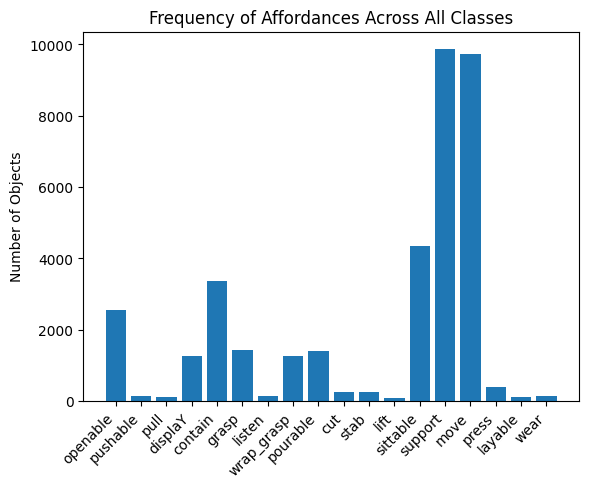

In [29]:
import matplotlib.pyplot as plt

affordance_totals = defaultdict(int)
for semantic_class, counts in affordance_counts.items():
    for affordance, count in counts.items():
        affordance_totals[affordance] += count

# Bar plot
plt.bar(affordance_totals.keys(), affordance_totals.values())
plt.xticks(rotation=45, ha='right')
plt.title("Frequency of Affordances Across All Classes")
plt.ylabel("Number of Objects")
plt.show()


In [30]:
import pandas as pd

class_affordance_matrix = pd.DataFrame.from_dict(affordance_counts, orient='index').fillna(0)
print(class_affordance_matrix)

# Save to a CSV for further analysis
class_affordance_matrix.to_csv("class_affordance_matrix.csv")

                  openable  pushable   pull  displaY  contain  grasp  listen  \
Door                 139.0     144.0  117.0      0.0      0.0    0.0     0.0   
Dishwasher           110.0       0.0    0.0      0.0    116.0    0.0     0.0   
Bag                   72.0       0.0    0.0      0.0     88.0   85.0     0.0   
Faucet               411.0       0.0    0.0      0.0      0.0  431.0     0.0   
Bottle               246.0       0.0    0.0      0.0    265.0  222.0     0.0   
Microwave            115.0       0.0    0.0      0.0    126.0    0.0     0.0   
StorageFurniture    1190.0       0.0    0.0      0.0   1512.0    0.0     0.0   
Refrigerator         124.0       0.0    0.0      0.0    113.0    0.0     0.0   
TrashCan             145.0       0.0    0.0      0.0    214.0    0.0     0.0   
Clock                  0.0       0.0    0.0    368.0      0.0    0.0     0.0   
Display                0.0       0.0    0.0    622.0      0.0    0.0     0.0   
Laptop                 0.0       0.0    

In [31]:
# Select the first object
object_data = val_data[0]

# Extract relevant information
coords = object_data['full_shape']['coordinate']
affordance_label = object_data['full_shape']['label']['grasp']  # Replace 'grasp' with desired affordance

print("Selected Object Class:", object_data['semantic class'])
print("Affordance Label Shape:", affordance_label.shape)

Selected Object Class: Door
Affordance Label Shape: (2048, 1)


In [32]:
import numpy as np

# Convert to numpy arrays for easy handling
coords = np.array(coords)  # Shape: [N, 3]
affordance_label = np.array(affordance_label)  # Shape: [N]

# Print summary of the affordance labels
print("Unique Label Values:", np.unique(affordance_label, return_counts=True))


Unique Label Values: (array([0.], dtype=float32), array([2048]))


In [33]:
print("Coordinate Range:")
print("X:", coords[:, 0].min(), "-", coords[:, 0].max())
print("Y:", coords[:, 1].min(), "-", coords[:, 1].max())
print("Z:", coords[:, 2].min(), "-", coords[:, 2].max())

print("\nAffordance Label Range:")
print("Min:", affordance_label.min(), "Max:", affordance_label.max())

Coordinate Range:
X: -0.37066707 - 0.37742716
Y: -0.9256907 - 0.85324085
Z: -0.03076853 - 0.046578325

Affordance Label Range:
Min: 0.0 Max: 0.0


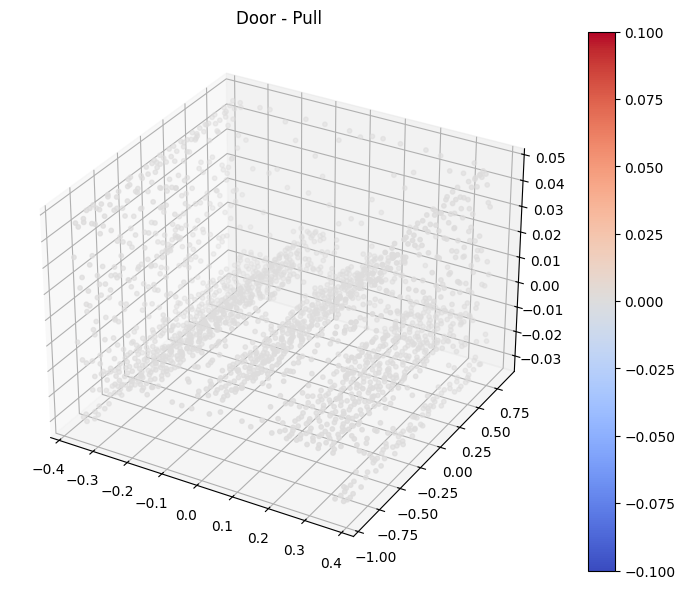

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_points(coords, labels, title="3D Scatter Plot"):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        coords[:, 0], coords[:, 1], coords[:, 2],
        c=labels, cmap='coolwarm', s=10
    )
    plt.colorbar(scatter)
    ax.set_title(title)
    plt.show()

# Plot the object with ground truth labels
plot_3d_points(coords, affordance_label, title=f"{object_data['semantic class']} - Pull")


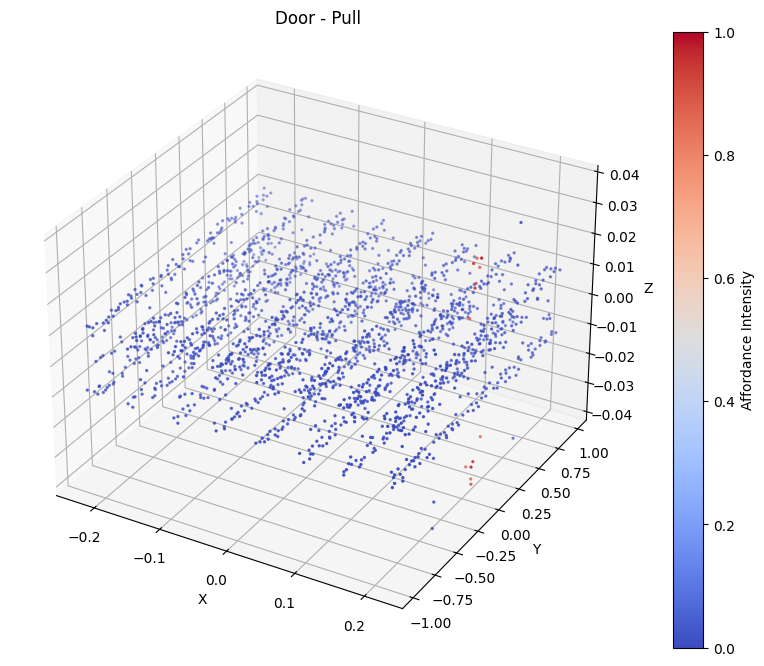

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select an object with non-zero affordance labels
selected_class = "Door"
selected_affordance = "Pull"

# Find an object with non-zero labels for the selected affordance
for entry in train_data:
    if entry["semantic class"] == selected_class and selected_affordance in entry["full_shape"]["label"]:
        label = entry["full_shape"]["label"][selected_affordance]
        if label.max() > 0:  # Ensure non-zero values
            coords = entry["full_shape"]["coordinate"]
            break

# Plot the coordinates and affordance label
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalize the label values for better visualization
norm_labels = label / label.max()

# Scatter plot with color-coded affordance regions
sc = ax.scatter(
    coords[:, 0], coords[:, 1], coords[:, 2],
    c=norm_labels, cmap="coolwarm", s=2
)

ax.set_title(f"{selected_class} - {selected_affordance}")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Add a color bar to show the affordance intensity
plt.colorbar(sc, label="Affordance Intensity")
plt.show()
